## Chapter 1: The Machine Learning Landscape

In [6]:
# Basic Package Installation
%pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Exp 1.1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model 

In [8]:
# load data
oecd_bli = pd.read_csv('oecd_bli_2015.csv', thousands=',')
gdb_per_capita = pd.read_csv('gdp_per_capita.csv', thousands=',', delimiter='\t', encoding='latin1', na_values="n/a")

In [9]:
# view data
print(oecd_bli.head())
print(gdb_per_capita.head())

  LOCATION         Country INDICATOR                           Indicator  \
0      AUS       Australia   HO_BASE  Dwellings without basic facilities   
1      AUT         Austria   HO_BASE  Dwellings without basic facilities   
2      BEL         Belgium   HO_BASE  Dwellings without basic facilities   
3      CAN          Canada   HO_BASE  Dwellings without basic facilities   
4      CZE  Czech Republic   HO_BASE  Dwellings without basic facilities   

  MEASURE Measure INEQUALITY Inequality Unit Code        Unit  PowerCode Code  \
0       L   Value        TOT      Total        PC  Percentage               0   
1       L   Value        TOT      Total        PC  Percentage               0   
2       L   Value        TOT      Total        PC  Percentage               0   
3       L   Value        TOT      Total        PC  Percentage               0   
4       L   Value        TOT      Total        PC  Percentage               0   

  PowerCode  Reference Period Code  Reference Period  Va

In [10]:
# Prepare data
def prepare_country_stats(oecd_bli, gdp_per_capita):
    # Filter the OECD data for "Life satisfaction" indicator
    oecd_bli = oecd_bli[oecd_bli['Indicator'] == 'Life satisfaction']
    oecd_bli = oecd_bli[['Country', 'Value']].rename(columns={'Value': 'Life satisfaction'})
    
    # Rename the GDP column for clarity
    gdp_per_capita = gdp_per_capita.rename(columns={'2015': 'GDP per capita'})
    
    # Merge the two datasets on the "Country" column
    full_country_stats = pd.merge(gdp_per_capita, oecd_bli, on='Country')
    
    # Set the "Country" column as the index
    full_country_stats.set_index('Country', inplace=True)
    
    # Drop missing values
    full_country_stats.dropna(inplace=True)
    
    return full_country_stats


In [11]:
country_stats = prepare_country_stats(oecd_bli, gdb_per_capita)

In [12]:
X, y= np.c_[country_stats['GDP per capita']], np.c_[country_stats['Life satisfaction']]

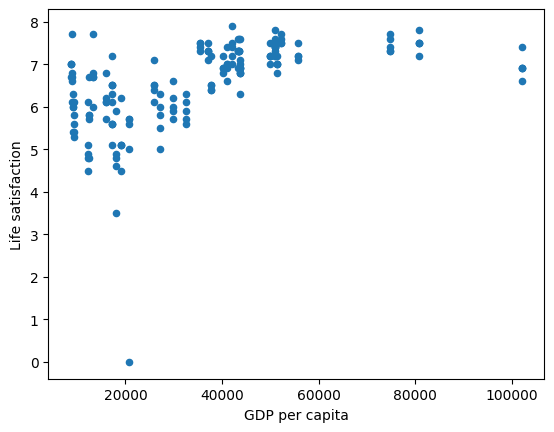

In [13]:
# visual the data
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

In [14]:
# select a liner model
model = sklearn.linear_model.LinearRegression()

In [15]:
# train the model
model.fit(X, y)

LinearRegression()

In [16]:
# make a prediction
X_new = [[22587]]  # GDP per capita of a new country
predicted_life_satisfaction = model.predict(X_new)
print(predicted_life_satisfaction)

[[6.24439261]]
